In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_iris
%matplotlib inline

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2fc970b10>]],
      dtype=object)

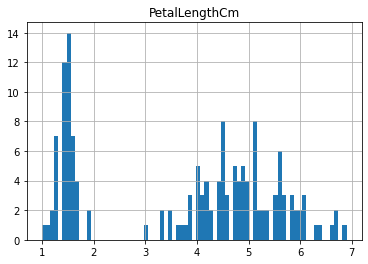

In [ ]:
df.hist(column='PetalLengthCm',bins=75)

In [ ]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y = df['Species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=13)
print('Train Set : ', X_train.shape , y_train.shape)
print('Test Set : ', X_test.shape , y_test.shape)
y_test[0:10]

Train Set :  (112, 4) (112,)
Test Set :  (38, 4) (38,)


array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNNC

In [ ]:
k = 4

knn = KNNC(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [ ]:
yhat = knn.predict(X_test)
yhat[0:10]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [ ]:
from sklearn import metrics
print("Train accuracy : ", metrics.accuracy_score(y_train,knn.predict(X_train)))
print("Test accuracy  : ", metrics.accuracy_score(y_test,yhat))

Train accuracy :  0.9642857142857143
Test accuracy  :  0.8947368421052632


In [ ]:
Ks = 16
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx=[];

for n in range(1,Ks):
  neighbor = KNNC(n_neighbors=n).fit(X_train,y_train)
  yhat = neighbor.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)

  std_acc [n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.97368421, 0.92105263, 0.97368421, 0.89473684, 0.94736842,
       0.94736842, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.94736842, 0.94736842, 0.94736842, 0.97368421])

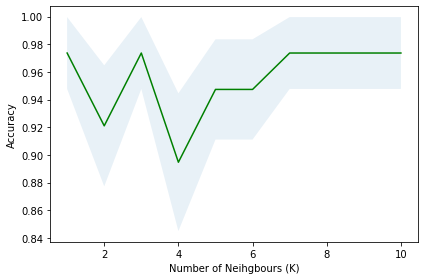

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.ylabel('Accuracy')
plt.xlabel('Number of Neihgbours (K)')
plt.tight_layout()
plt.show()